In [133]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

In [140]:
dataset_ = [[3.3,2.3,0],
        [3.1,1.7,0],
        [1.3,3.3,0],
        [3.5,4.6,0],
        [2.2,2.8,0],
        [7.4,4.6,1],
        [5.7,3.5,1],
        [9.1,2.5,1],
        [7.7,3.4,1],
        [7.9,0.7,1]]
dataset_ = np.array(dataset_, dtype = 'float64')
target_ = [int(i[-1]) for i in dataset_]
target = [3.0, 2.8]

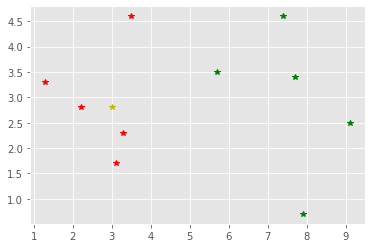

In [141]:
color = {0: 'r', 1:'g'}
[plt.plot(i[0], i[1], '*', color = color[i[2]]) for i in dataset_]
plt.plot(target[0], target[1], '*y') #taking target is of yellow colour

In [142]:
import math
from math import exp, pi
from statistics import mean, stdev
def std_dev(numbers):
    n = len(numbers)
    l = [mean(numbers)]*n
    numbers = np.array(numbers)
    l = np.array(l)
    return sqrt((sum((numbers-l)**2))/n)

In [143]:
def separate_by_class(data, target):
    saparated = dict()
    for i in range(len(data)):
        vector = data[i]
        if(target[i] not in saparated):
            saparated[target[i]] = list()
        saparated[target[i]].append(vector)
    return saparated

def summaries(data):
    return [(mean(column), stdev(column)) for column in zip(*data)]

def summarize_by_class(data, target_):
    saparated = separate_by_class(data, target_)
    summary = dict()
    for class_val, rows in saparated.items():
        summary[class_val] = summaries(rows)
    return summary

#gaussian probability function
def probability(x, mean, std_dev):
    exponant = exp(-((x-mean)**2)/(2*std_dev**2))
    return (1/sqrt(2*pi)*std_dev) * exponant


In [144]:
separated_data = separate_by_class(dataset_, target_)
separated_data

{0: [array([3.3, 2.3, 0. ]),
  array([3.1, 1.7, 0. ]),
  array([1.3, 3.3, 0. ]),
  array([3.5, 4.6, 0. ]),
  array([2.2, 2.8, 0. ])],
 1: [array([7.4, 4.6, 1. ]),
  array([5.7, 3.5, 1. ]),
  array([9.1, 2.5, 1. ]),
  array([7.7, 3.4, 1. ]),
  array([7.9, 0.7, 1. ])]}

In [146]:
data_= [i[:-1] for i in dataset_]
res = summarize_by_class(data_, target_)
res

{0: [(2.68, 0.9176055797563569), (2.94, 1.1013627921806692)],
 1: [(7.5600000000000005, 1.2239281024635391), (2.94, 1.4570518178843195)]}

In [147]:
def class_prob(data, target, target_):
    summeries_ = summarize_by_class(data,target_)
    probs = dict()
    length = len(set(target))
    for i in range(length):
        probs[i] = 1/length
    len_ = len(data[0])
    for class_ in range(length):
        for i in range(len_):
            probs[class_]*=probability(target[i], summeries_[class_][i][0], summeries_[class_][i][1])
    return probs  

In [162]:
data_= [i[:-1] for i in dataset_]
data_, target_, target

([array([3.3, 2.3]),
  array([3.1, 1.7]),
  array([1.3, 3.3]),
  array([3.5, 4.6]),
  array([2.2, 2.8]),
  array([7.4, 4.6]),
  array([5.7, 3.5]),
  array([9.1, 2.5]),
  array([7.7, 3.4]),
  array([7.9, 0.7])],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [3.0, 2.8])

In [159]:
res = class_prob(data, target, target_)
print(res)

{0: 0.07506879584686553, 1: 0.00013671477168539727}


In [ ]:
#this result tells us about probability of that target in each class
#we can conclude from here that the targrt must belong to class "0" because it has more probability than the others

class to which target data belongs is : 0


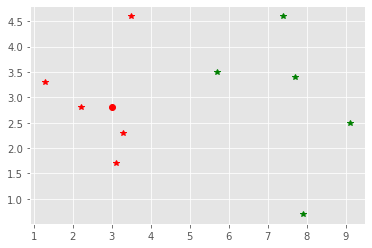

In [174]:
class_res = -1
max_ = -1
for i in res:
    if(res[i] >max_):
        class_res = i
        max_ = res[i]
print(f'class to which target data belongs is : {class_res}')

[plt.plot(data_[i][0], data_[i][1], '*', color = color[target_[i]]) for i in range(len(data_))]
plt.plot(target[0], target[1], 'o', color = color[class_res])

In [ ]:
#target_data 'o' belongs to '0' class which is of red coloured and here it is also represented in graph by red 'o'.